#  Закрепление знаний

--------

⭐ Настало время попробовать свои силы в настоящей Data Science задаче с Kaggle.

**Бизнес:** Банк хочет разработать кампанию лояльности по удержанию клиентов, но для этого ему необходимо, чтобы вы выяснили основные причины оттока клиентов.

**Задача:** Нужно установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов.

Вам представлены данные об оттоке клиентов некоторого банка. Для начала работы с базой данных необходимо загрузить необходимые библиотеки по обработке данных и последующей визуализации.

In [654]:
# importing the required library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Необходимо выполнить чтение и копирование базы данных.

In [655]:
churn_data = pd.read_csv('churn.csv')
churn_df = churn_data.copy()
churn_df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


Столбцы таблицы:

0. RowNumber — номер строки таблицы;
1. CustomerId — идентификатор клиента;
2. Surname — фамилия клиента;
3. CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их);
4. Geography — страна клиента (банк международный);
5. Gender — пол клиента;
6. Age — возраст клиента;
7. Tenure — сколько лет клиент пользуется услугами банка;
8. Balance — баланс на счетах клиента в банке;
9. NumOfProducts — количество услуг банка, которые приобрёл клиент;
10. HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет);
11. IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет);
12. EstimatedSalary — предполагаемая заработная плата клиента;
13. Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент).


In [656]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Итак, банк обращается к вам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов, но для этого ему необходимо, чтобы вы выяснили основные причины оттока клиентов. Иными словами, нужно установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов.

После разведывательного анализа, с целью выявления наиболее важных признаков оттока, банк сможет построить модель машинного обучения, которая будет прогнозировать уход клиента.

Изменения в столбцах таблицы, вызванные сокращениями необходимой информации для построения модели обработки данных о клиентах:

0. CustomerId — идентификатор клиента;
1. CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их);
2. Geography — страна клиента (банк международный);
3. Gender — пол клиента;
4. Age — возраст клиента;
5. Tenure — сколько лет клиент пользуется услугами банка;
6. Balance — баланс на счетах клиента в банке;
7. NumOfProducts — количество услуг банка, которые приобрёл клиент;
8. HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет);
9. IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет);
10. EstimatedSalary — предполагаемая заработная плата клиента;
11. Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент);
12. Loyal - статус лояльности;
13. Status - статус активного клиента.

Произведем удаление незадействованных столбцов таблицы:

1. RowNumber — номер строки таблицы;
2. Surname — фамилия клиента.

In [657]:
churn_df = churn_df.drop(['RowNumber', 'Surname'], axis=1)
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Узучив представленный дата фрейм можно сказать по описанию признаков, что они относятся к категориальному типу данных. Под категориальными признаками обычно подразумевают столбцы в таблице, которые обозначают принадлежность объекта к какому-то классу/категории. Чаще всего представлены в виде текстового описания и кодируются в Pandas типом данных object: Geography, Gender. Однако это не всегда так. Например, загруженные нами ранее признаки: NumOfProducts, HasCrCard, IsActiveMember, Exited кодируется числом (int64), но на самом деле является категориальным, поскольку диапазон их значений ограничен и каждому числу мы можем поставить соответствующее значение. Поэтому признаки могут быть разделены:
- Номинальные (Geography, Gender);
- Порядковыми (NumOfProducts), а также они являются бинарными(HasCrCard, IsActiveMember, Exited), поэтому их можно преобразовать в текстовую информацию (object).

In [658]:
churn_df['HasCrCard'] = churn_df['HasCrCard'].apply(lambda x: 'Нет карты' if x == 0 else 'Есть карта')
churn_df['IsActiveMember'] = churn_df['IsActiveMember'].apply(lambda x: 'Неактивный' if x == 0 else 'Активный')
churn_df['Exited'] = churn_df['Exited'].apply(lambda x: 'Лояльный' if x == 0 else 'Ушедший')
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  object 
 9   IsActiveMember   10000 non-null  object 
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 937.6+ KB


Выполнили преобразования столбцов HasCrCard, IsActiveMember, Exited в текстовую информацию (object), что в дальнейшем упростит построение графиков.

In [659]:
churn_df.head(3)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,Есть карта,Активный,101348.88,Ушедший
1,15647311,608,Spain,Female,41,1,83807.86,1,Нет карты,Активный,112542.58,Лояльный
2,15619304,502,France,Female,42,8,159660.80,3,Есть карта,Неактивный,113931.57,Ушедший


Предобработка данных:

In [660]:
# customer separation
ratio_df = churn_df['Exited'].value_counts()
# filtered customers due to balance
# according to the condition
balance = churn_df[churn_df.Balance > 2500]
# making a summary table
bar_data = churn_df.groupby(['NumOfProducts', 'Exited'], as_index=False).count()
# filtered by gender
gender = churn_df['Gender'].value_counts()
# making a summary table
activ = churn_df.groupby(['IsActiveMember', 'Exited'], as_index=False).count()


## Задание 9.1

-----------

Каково соотношение ушедших и лояльных клиентов?

Покажите это на графике и дайте комментарий по соотношению.

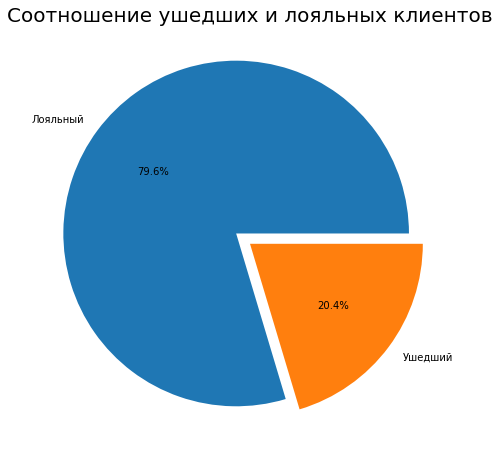

In [661]:
fig = plt.figure(figsize=(6, 6))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    ratio_df,
    labels=ratio_df.index,
    autopct='%.1f%%',
    explode=[0.1, 0]
)
axes.set_title('Соотношение ушедших и лояльных клиентов', fontsize=20)
plt.savefig('ratio.png')
plt.show()
plt.close()


Количество лояльных клиентов практически в 4 раза больше, чем ушедших. Позитивный показатель, который говорит об отсутсвии массового оттока клиентов, не более 20%.

##  Задание 9.2

----------

Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

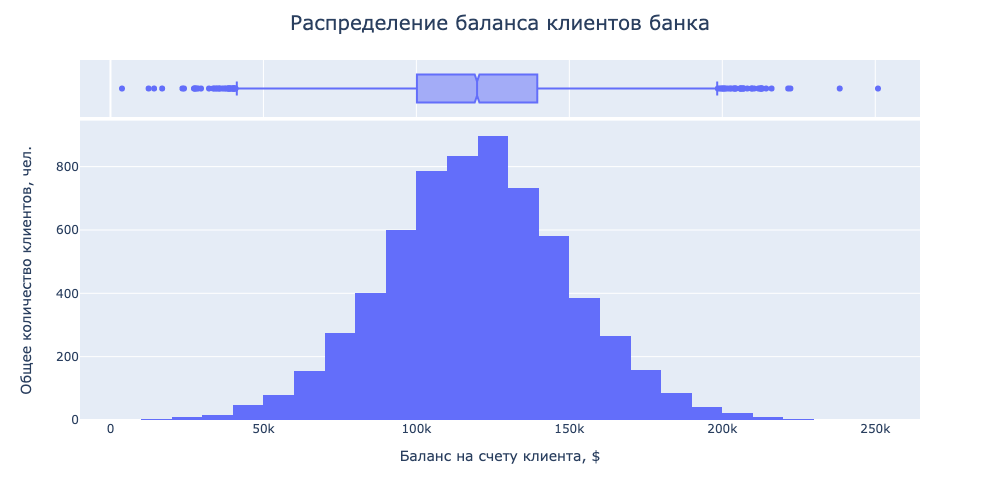

In [662]:
fig = px.histogram(
    balance,
    x='Balance',
    marginal='box',
    nbins=30
)
fig.update_layout(
    title_font_size=20,
    height=500,
    width=1000,
    xaxis_title='Баланс на счету клиента, $',
    yaxis_title='Общее количество клиентов, чел.'
)
fig.update_layout(
    title={
        'text':'Распределение баланса клиентов банка',
        'x':0.5,
        'xanchor':'center'
    }
)
fig.show('png')


In [663]:
fig.write_image('balance.png',
                scale=.85,
                engine="kaleido")

Выводы:

Основная часть пользователей сосредоточена в интервале от 50 до 200 тысяч, а наибольшее число клиентов сосредоточено в интервале от 100 до 140 тысяч. Самый высокий прямоугольник расположен в отметке баланса равной 120 тысячам - медианное значение. Далее при увеличении баланса количество пользователей только падает, что говорит нам о том, что в банке обслуживается преимущественно клиенты среднего класса, ввиду наличия одного вклада более 250 тысяч и незначительного количества клиентов с балансом более 200 тысяч, но менее 250 тысяч. Соответственно при разработке программы лояльности, необходимо учитывать чувствительность клиентов к ценовым предложениям по обслуживанию счета и программе лояльности, в основном сосредоточенной в среднем ценовом сегменте. По графику можно отметить, что распределение близко к нормальному.

## Задание 9.3

--------

Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

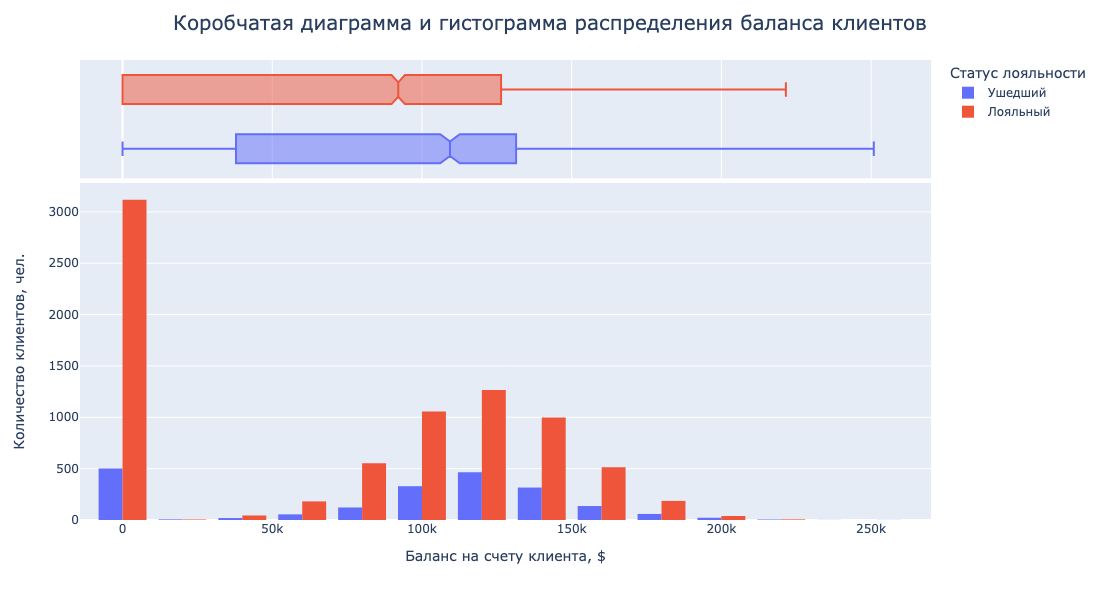

In [664]:
fig = px.histogram(
    data_frame=churn_df,
    x='Balance',
    marginal='box',
    color='Exited',
    nbins=20,
    labels={'Exited': 'Статус лояльности'},
    barmode='group'
)
fig.update_layout(
    title_font_size=20,
    height=600,
    width=1100,
    xaxis_title='Баланс на счету клиента, $',
    yaxis_title='Количество клиентов, чел.'
)
fig.update_layout(
    title={
        'text':'Коробчатая диаграмма и гистограмма распределения баланса клиентов',
        'x':0.5,
        'xanchor':'center'
    }
)
fig.show('png')


In [665]:
fig.write_image('balance_distributiont.png',
                scale=.85,
                engine="kaleido")


Вывод:

На коробчатой диаграмме видно смещение, это вызвано большим количеством лояльных клиентов с нулевым балансом, те кто открыл счет, но не пополнил его 3117 человек, что видно на гистограмме. Подобное смещение к нулю на коробчатой диаграмме видно у ушедших клиентов, так как общее количество пользователей с нулевым балансом 3618 человек, ушедших 501 человек, что составляет 14 % от общего числа клиентов с нулевым балансом. Учитывая общее количество пользователей с нулевым балансом, можно сказать, что часть клиентов пользовалась услугами банка как дополнительными, при этом имея основной счет в другом банке на более выгодных условиях или используя преимущественно наличные деньги.

На гистограмме исходя из полученного распределения накоплений лояльных и ушедших клиентов видно, что распределение в обоих случаях нормальное. Это говорит о том, что накопления ушедших и лояльных клиентов распределены по балансу на счете примерно одинаково. Видно, так же что ушедших клиентов гораздо меньше, чем лояльных, суммарное количество лояльных пользователей превышает количество ушедших в 2.5 раза, позитивная динамика. Также большое количество пользователей на сумме баланса которых от 49 тысяч USD до 180 тысяч USD, 631 человек с медианным балансом в 120 тысяч USD, ушедших 244 человека. На коробчатой диаграмме видно смешение медианного значения суммы баланса клиентов с Задания 9.2 со 120 тысяч USD до 92 тысяч USD у лояльных, и 109 тысяч USD у ушедших из-за клиентов с нулевым балансом. Сделать выводы о том, что может не устраивать ушедших из банка клиентов по данному распределению не получится. Необходимы дальнейшие исследования.


## Задание 9.4

---------

 Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

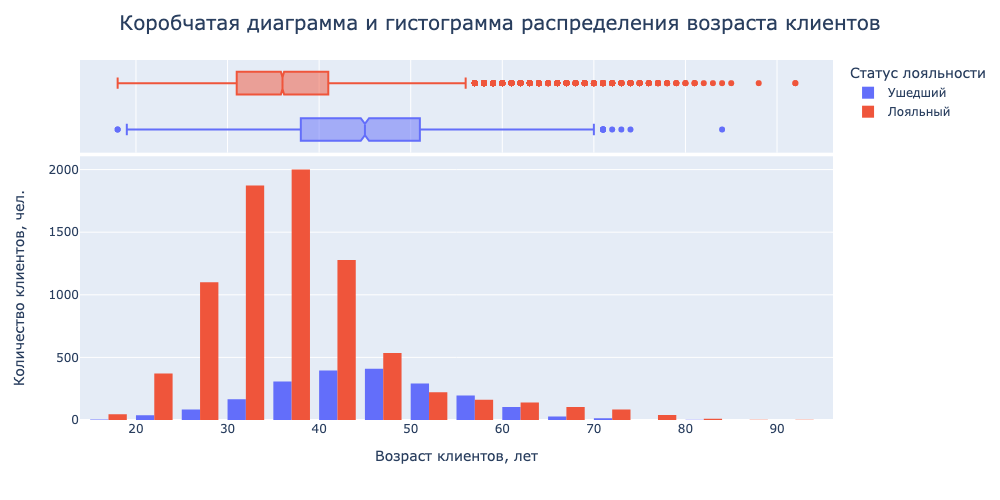

In [666]:
fig = px.histogram(
    data_frame=churn_df,
    x='Age',
    marginal='box',
    color='Exited',
    nbins=20,
    labels={'Exited': 'Статус лояльности'},
    barmode='group'
)
fig.update_layout(
    title_font_size=20,
    height=500,
    width=1000,
    xaxis_title='Возраст клиентов, лет',
    yaxis_title='Количество клиентов, чел.'
)
fig.update_layout(
    title={
        'text':'Коробчатая диаграмма и гистограмма распределения возраста клиентов',
        'x':0.5,
        'xanchor':'center'
    }
)
fig.show('png')


In [667]:
fig.write_image('age_distributiont.png',
                scale=.85,
                engine="kaleido")

Вывод:

Большое количество потенциальных выбросов находится в лояльной группе, что видно на коробчатой диаграмме, причем это клиенты в возрасте от 57 до 92 лет. Их количество говорит нам о незначительной части клиентов от общего числа. Стоит обратить внимание на группу в возрасте от 38 лет до 51 года на коробчатой диаграмме, так как часть клиентов, сосредоточенная в данном возрасте, находится в категории ушедших клиентов, выбросов незначительное количество. Сравнивая с лояльными клиентами, получаем ящик с усами от 31 года до 41 года, где заканчивается ящик с лояльными клиентами и начинается ящик с ушедшими 38 лет, что говорит об определенном возрастном сдвиге в использовании услуг банка. Разработка программы лояльности должна быть рассчитана на привлечение возрастной группы от 38 лет до 51 года, которые старше на 10 лет категории лояльных клиентов, что подтверждается медианными значениями 36 лет у лояльной категории, и 45 лет у ушедшей категории.

На гистограмме исходя из полученного распределения возраста лояльных и ушедших клиентов видно, что распределение в обоих случаях нормальное, со значительным количеством клиентов 2001 человек в категории лояльных от 35 лет до 39 лет. После начинается существенное падение количества лояльных клиентов из-за возраста, более чем в 2 раза. Но у количества ушедших клиентов нету такого же падения клиентов, связанных с возрастом и распределение более близкое к нормальному.


##  Задание 9.5

-----------

Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.


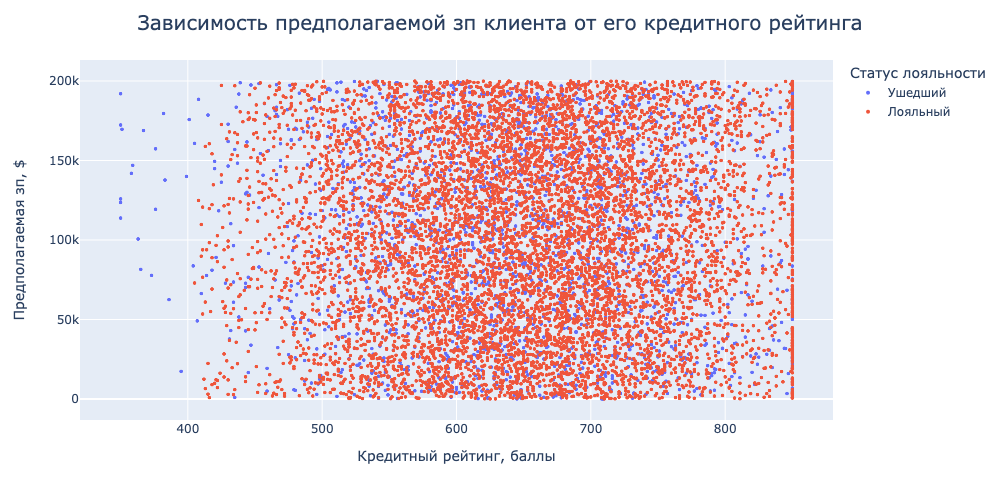

In [668]:
fig = px.scatter(
    data_frame=churn_df,
    x='CreditScore',
    y='EstimatedSalary',
    color='Exited',
    labels={'Exited': 'Статус лояльности'}
)
fig.update_layout(
    title_font_size=20,
    height=500,
    width=1000,
    xaxis_title='Кредитный рейтинг, баллы',
    yaxis_title='Предполагаемая зп, $'
)
fig.update_layout(
    title={
        'text':'Зависимость предполагаемой зп клиента от его кредитного рейтинга',
        'x':0.5,
        'xanchor':'center'
    }
)
fig.update_traces(marker_size=4)
fig.show('png')


In [669]:
fig.write_image('salary.png',
                scale=.85,
                engine="kaleido")

Выводы:

Чем выше кредитный рейтинг, тем "облако" точек плотнее в концентрации, но к увеличению за 760 кредитного рейтинга заметное снижение концентрации. На предполагаемою заработную плату оказал влияние признак оттока клиентов, так как можно увидеть пробелы в "облаке" точек, но при этом заметна равномерная концентрация от самой низкой до самой высокой заработной платы клиента. В целом наблюдается равномерное распределение точек по секторам, что говорит о заинтерисованности в услугах банка людей как с высокой, так и с низкой заработной платой, увеличение влияния параметра кредитного рейтинга начинается после 500 и завершается до 800, а признак лояльности клиента увеличил пробелы в облаке клиентов.


##  Задание 9.6

------

Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

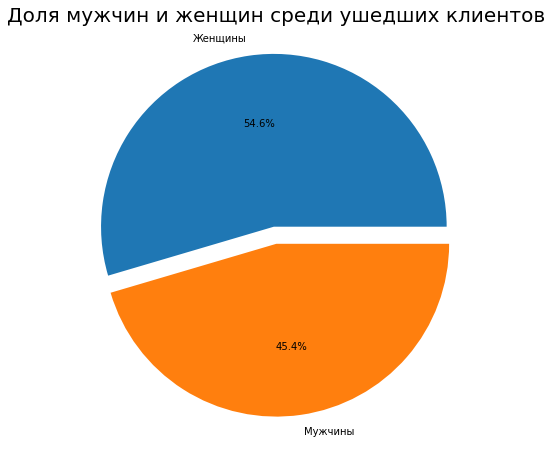

In [670]:
fig = plt.figure(figsize=(6, 6))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    gender,
    labels=['Женщины', 'Мужчины'],
    autopct='%.1f%%',
    explode=[0.1, 0]
)
axes.set_title('Доля мужчин и женщин среди ушедших клиентов', fontsize=20)  # title
plt.savefig('sex.png')
plt.show()
plt.close()


Выводы:

Разница небольшая, но женщины уходят чаще, чем мужчины.

##  Задание 9.7

------

Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

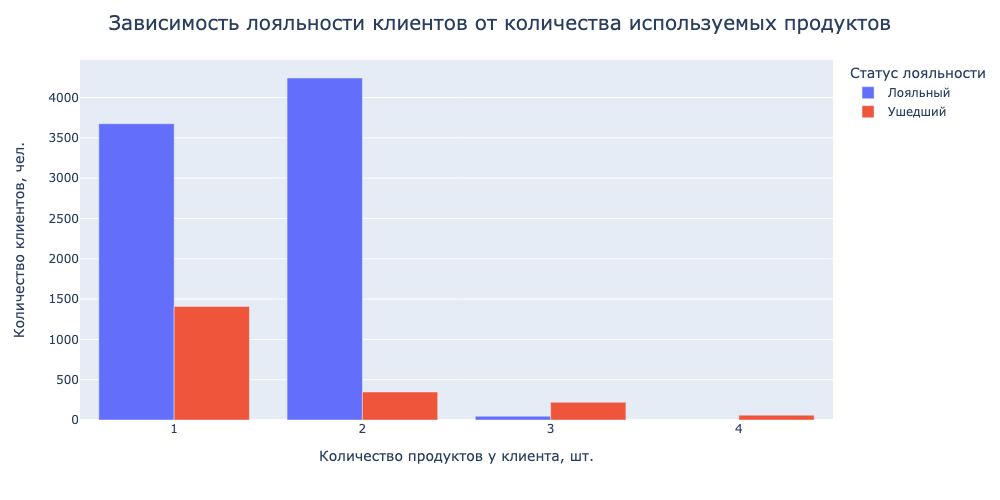

In [671]:
fig = px.bar(
    data_frame=bar_data,
    x='NumOfProducts',
    y='CustomerId',
    color='Exited',
    labels={'Exited': 'Статус лояльности'},
    barmode='group'
)
fig.update_layout(
    title_font_size=20,
    height=500,
    width=1000,
    xaxis_title='Количество продуктов у клиента, шт.',
    yaxis_title='Количество клиентов, чел.'
)
fig.update_layout(
    title={
        'text':'Зависимость лояльности клиентов от количества используемых продуктов',
        'x':0.5,
        'xanchor':'center'
    }
)
fig.show('png')


In [672]:
fig.write_image('bank_service.png',
                scale=.85,
                engine="kaleido")

Выводы:

Из диаграммы видно, что при наличии 3-х и более услуг у клиента, статус нелояльности к банку увеличивается и превалирует над лояльными клиентами. В категории клиентов, у которых 2-е услуги лояльных больше на 13,4 %, чем в категории клиентов, у которых одна услуга, при этом существенное падение на 98,92 % в категории 3-х услуг, и на 100 % в категории 4-х услуг соответственно. Что говорит о низкой привлекательности банка как экосистемы продуктов, ввиду популярности использования 1-ой или 2-мя услугами из продуктовой линейки банка. Тем самым получается, что самая привлекательная категория клиентов у банка, те кто пользуется двумя услугами, так как самый высокий процент лояльности в аудитории. Необходима программа по увеличению лояльности среди клиентов с одной услугой, для удержания клиентов в банке. И проработка дополнительных услуг, которые не являются привлекательными для аудитории.

##  Задание 9.8

----------

Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

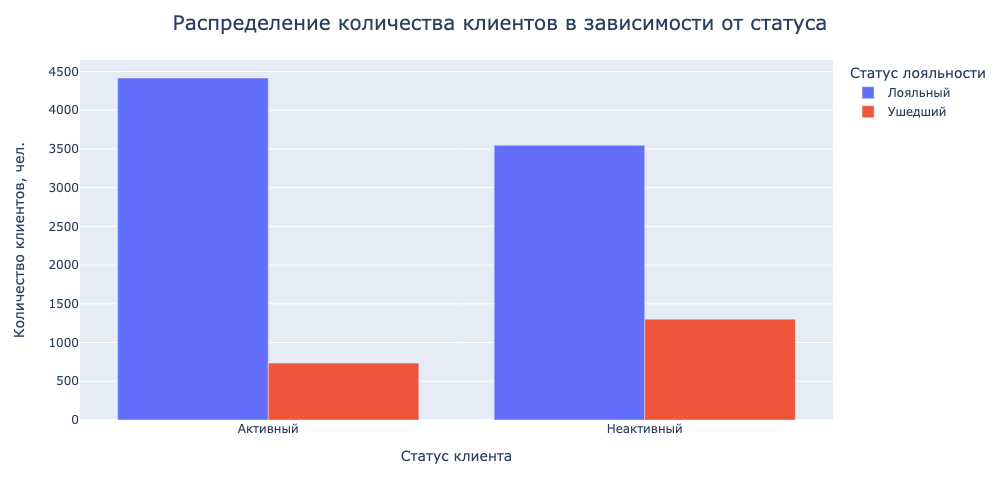

In [673]:
fig = px.bar(
    data_frame=activ,
    x='IsActiveMember',
    y='CustomerId',
    color='Exited',
    labels={'Exited': 'Статус лояльности'},
    barmode='group'
)
fig.update_layout(
    title_font_size=20,
    height=500,
    width=1000,
    xaxis_title='Статус клиента',
    yaxis_title='Количество клиентов, чел.'
)
fig.update_layout(
    title={
        'text':'Распределение количества клиентов в зависимости от статуса',
        'x':0.5,
        'xanchor':'center'
    }
)
fig.show('png')


In [674]:
fig.write_image('statys.png',
                scale=.85,
                engine="kaleido")

Выводы:

Активных клиентов на 5,86% больше, чем не активных, получается что деление просходит примерно пополам. При этом активных, но не лояльных клиентов меньше на 43,54%, чем в категории не активных клиентов, что говорит нам о 83,35% лояльных и активных клиентах, остаток клиентов не является лояльным к банку. Неактивных, но лояльных клиентов в банке 63,3%, остальные не являются активными и лояльными. В группе клиентов, которая не является активной, но при этом лояльна необходимо выявить спект услуг, неиспользуемый клиентом или успользуемый в другом учереждении для привлечения.

##  Задание 9.9

----------

В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

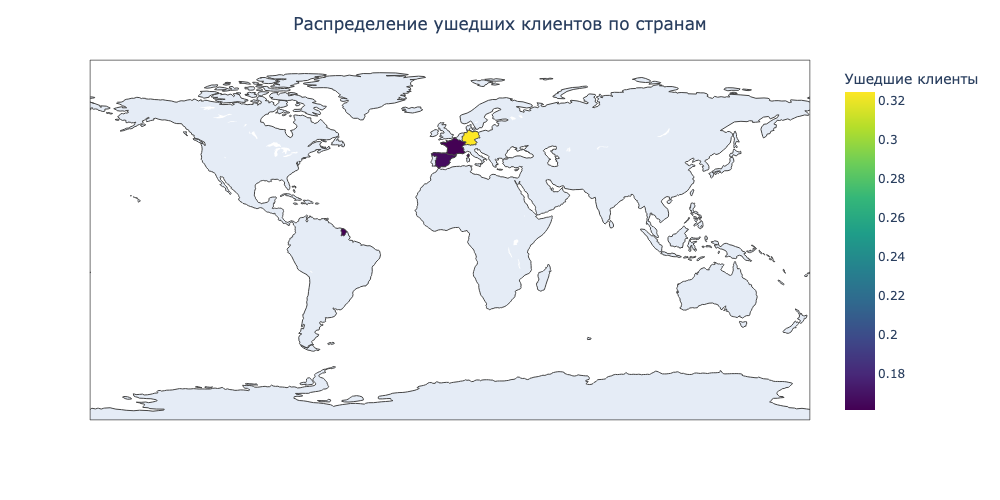

In [675]:
churn_df['Exited'] = churn_df['Exited'].apply(lambda x: 0 if x == 'Лояльный' else 1)
churn_countryes = churn_df.groupby(['Geography'] , as_index=False)[['Exited']].mean()
fig = px.choropleth(
    data_frame=churn_countryes,
    locations="Geography",
    locationmode = "country names",
    color="Exited",
    color_continuous_scale="Viridis",
    labels={'Exited':'Ушедшие клиенты'},
    width=1000,
    height=500
)
fig.update_layout(
    title={
        'text':'Распределение ушедших клиентов по странам',
        'x':0.5,
        'xanchor':'center'
    }
)
fig.show('png')


In [676]:
fig.write_image('geo.png',
                scale=.85,
                engine="kaleido")

Выводы:

Из полученного распределения видно, что самая большая доля ушедших клиентов из Германии, примерно половина всех ушедших, вполне возможно отток клиентов связан с изменением условий обслуживания на территории страны.

##  Задание 9.10

--------

Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [677]:
def get_credit_score_cat(credit_score):
    '''function for converting a numerical feature into a categorical one'''
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"


In [678]:
# application of a function
churn_df['CreditScoreCat'] = churn_df['CreditScore'].apply(get_credit_score_cat)
# building a pivot table
credit_cat = churn_df.pivot_table(
    values='Exited',  # column, the feature whose
    # statistical summary is to be seen
    index='CreditScoreCat',  # column, used for indexing
    # the feature passed in the values argument
    columns='Tenure',  # column, used for aggregating
    # the values according to certain features
    aggfunc='mean',  # the operation of getting
    # the average from the date frame
    fill_value=0,  # value to replace
    # missing values with (in the
    # resulting pivot table, after aggregation)
)

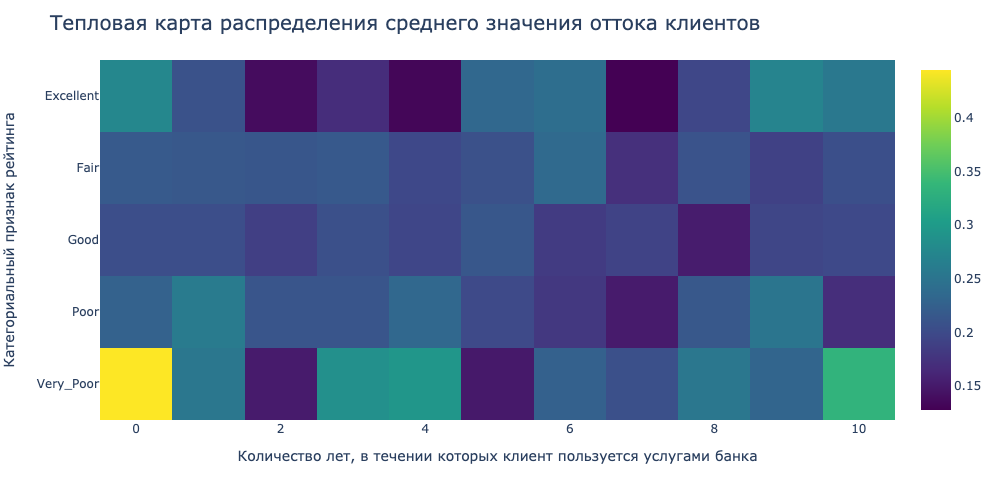

In [681]:
fig = px.imshow(credit_cat, color_continuous_scale='Viridis')
# chart captions and dimensions
fig.update_layout(
    title='Тепловая карта распределения среднего значения оттока клиентов',  # title
    title_font_size=20,  # signature font size
    height=500,  # height
    width=1000,  # width
    xaxis_title='Количество лет, в течении которых клиент пользуется услугами банка',  # captions to chart columns (abscissa)
    yaxis_title='Категориальный признак рейтинга'  # captions to chart columns (ordinate)
)

fig.show('png')


In [680]:
fig.write_image('score.png',
                scale=.85,
                engine="kaleido")

Выводы:

Чаще всего — это клиенты с низким рейтингом, которые только начали пользоваться услугами, но по каким-то причинам не понравилось или доверие которых банк не заполучил. По тепловой карте видно, что чем выше категория клиентов, тем меньше потерь среди клиентов, но при этом высокое количество в категории "Превосходно", в первый год использования и после 9 лет. Так же можно обратить внимание на категорию "Превосходно" в области использования услуг от 2 до 4 лет, потом от 7 до 8 лет, преобладает холодный оттенок, что говорит о низком оттоке клиентов. В последующем происходит увеличение оттока клиентов согласно признаку рейтинга, что требует разработки программы лояльности для клиентов с длительным сроком обслуживания.